# 基础设置

In [1]:
# 调用所需程序包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn
from numpy.polynomial import Polynomial

In [2]:
# 设置绘图环境
seaborn.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 设置被插函数
f = lambda x: np.exp(-x / 4)

In [4]:
# 构造给定区间内的三次样条插值函数
def sample_bar(x, y, m, h, I):
    s = Polynomial(0)
    temp1 = Polynomial([x[I+1], -1])
    temp0 = Polynomial([-x[I], 1])
    s += (3 * temp1 ** 2 / h[I] ** 2 - 2 * temp1 ** 3 / h[I] ** 3) * y[I]
    s += (3 * temp0 ** 2 / h[I] ** 2 - 2 * temp0 ** 3 / h[I] ** 3) * y[I+1]
    s += (temp1 ** 2 / h[I] - temp1 ** 3 / h[I] ** 2) * m[I]
    s -= (temp0 ** 2 / h[I] - temp0 ** 3 / h[I] ** 2) * m[I+1]
    return s

# 计算$x_i$,$y_i$,$h_i$,$\lambda_i$以及$\mu_i$

In [5]:
# 设置插值节点
x = np.array(range(6)) * 4
x = x / 10
n = x.size - 1
y = f(x)
m_first = sp.misc.derivative(f, x[0], 1e-6)
m_last = sp.misc.derivative(f, x[-1], 1e-6)
M_first = sp.misc.derivative(f, x[0], 1e-6, n=2)
M_last = sp.misc.derivative(f, x[-1], 1e-6, n=2)

# 设置截断误差计算节点
xx = np.arange(0.2, 2.0, 0.2)
yy = f(xx)

# x[1:] -> xi
# x[:-1] -> xi-1
h = x[1:] - x[:-1]
# h[1:] -> hi
# h[:-1] -> hi-1
lambda_ = h[:-1] / (h[:-1] + h[1:])
# y[1:-1] -> yi
# y[:-2] -> yi-1
# y[2:] -> yi+1
mu = 3 * ((1 - lambda_) / h[:-1] * (y[1:-1] - y[:-2]) +
          lambda_ / h[1:] * (y[2:] - y[1:-1]))

# 取$D_1$型为三次样条的边界条件

for x in [0.0, 0.4]:


Polynomial([ 1.        , -0.25      ,  0.03122457, -0.00247677], domain=[-1.,  1.], window=[-1.,  1.])

for x in [0.4, 0.8]:


Polynomial([ 0.99998487, -0.2498865 ,  0.03094083, -0.00224032], domain=[-1.,  1.], window=[-1.,  1.])

for x in [0.8, 1.2]:


Polynomial([ 0.99987583, -0.24947762,  0.03042972, -0.00202736], domain=[-1.,  1.], window=[-1.,  1.])

for x in [1.2, 1.6]:


Polynomial([ 0.99954214, -0.24864338,  0.02973453, -0.00183424], domain=[-1.,  1.], window=[-1.,  1.])

for x in [1.6, 2.0]:


Polynomial([ 0.9988292 , -0.24730662,  0.02889905, -0.00166019], domain=[-1.,  1.], window=[-1.,  1.])

,自变量,被插函数值,插值函数值,截断误差
0,0.2,0.951229,0.951229,2.558740e-07
1,0.4,0.904837,0.904837,-3.330669e-16
2,0.6,0.860708,0.860708,2.213265e-07
3,0.8,0.818731,0.818731,-9.103829e-15
4,1.0,0.778801,0.778801,2.025544e-07
5,1.2,0.740818,0.740818,8.326673e-14
6,1.4,0.704688,0.704688,1.843174e-07
7,1.6,0.670320,0.670320,5.451195e-14
8,1.8,0.637628,0.637628,1.603335e-07


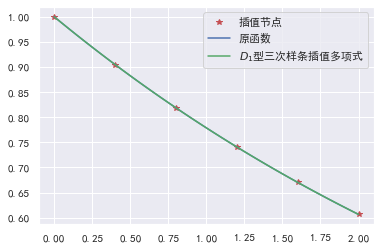

In [6]:
D1 = np.ones(n-1) * 2
D1 = np.diag(D1)
for I in range(n-2):
    D1[I, I+1] = lambda_[I]
    D1[I+1, I] = 1 - lambda_[I+1]
mu1 = mu.copy()
mu1[0] -= (1-lambda_[0]) * m_first
mu1[-1] -= (1-lambda_[-1]) * m_last
m_D1 = np.linalg.solve(D1, mu1)
m_D1 = np.hstack([m_first, m_D1, m_last])

# 计算各分段的三次样条插值函数
s1 = []
for I in range(n):
    print('for x in [{0}, {1}]:'.format(x[I], x[I+1]))
    s1.append(sample_bar(x, y, m_D1, h, I))
    display(s1[I])
# 合并各分段三次样条插值函数
s1_combined = lambda t:\
    sum([s1[I](t) * (t >= x[I]) * (t < x[I+1]) for I in range(n-1)]) +\
    s1[n-1](t) * (t >= x[n-1]) * (t <= x[n])

# 计算截断误差
df1 = {'自变量':xx, '被插函数值':yy,
       '插值函数值':s1_combined(xx), '截断误差':yy - s1_combined(xx)}
df1 = pd.DataFrame(df1)
display(df1)

# 绘制可视化结果
xxx = np.arange(0, 2.05, 0.05)
fig, ax = plt.subplots()
ax.plot(x, y, 'r*', label='插值节点')
ax.plot(xxx, f(xxx), 'b', label='原函数')
ax.plot(xxx, s1_combined(xxx), 'g', label=r'$D_1$型三次样条插值多项式')
ax.legend();

可见原函数与三次样条插值多项式几乎完全重合

# 取$D_2$型为三次样条的边界条件

for x in [0.0, 0.4]:


Polynomial([ 1.        , -0.24999518,  0.03130829, -0.00271621], domain=[-1.,  1.], window=[-1.,  1.])

for x in [0.4, 0.8]:


Polynomial([ 0.99991971, -0.249393  ,  0.02980286, -0.00146169], domain=[-1.,  1.], window=[-1.,  1.])

for x in [0.8, 1.2]:


Polynomial([ 1.00168137, -0.25599923,  0.03806064, -0.00490243], domain=[-1.,  1.], window=[-1.,  1.])

for x in [1.2, 1.6]:


Polynomial([ 0.97785253, -0.19642712, -0.01158279,  0.00888741], domain=[-1.,  1.], window=[-1.,  1.])

for x in [1.6, 2.0]:


Polynomial([ 1.18494285, -0.58472148,  0.23110119, -0.04167175], domain=[-1.,  1.], window=[-1.,  1.])

,自变量,被插函数值,插值函数值,截断误差
0,0.2,0.951229,0.951232,-2.142021e-06
1,0.4,0.904837,0.904837,-1.110223e-16
2,0.6,0.860708,0.860697,1.076383e-05
3,0.8,0.818731,0.818731,-9.103829e-15
4,1.0,0.778801,0.778840,-3.956956e-05
5,1.2,0.740818,0.740818,8.293366e-14
6,1.4,0.704688,0.704539,1.487303e-04
7,1.6,0.670320,0.670320,5.606626e-14
8,1.8,0.637628,0.638182,-5.542514e-04


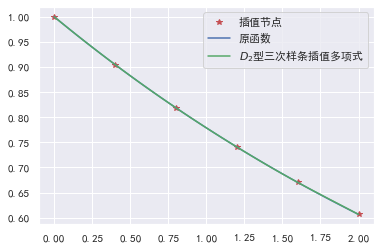

In [7]:
D2 = np.ones(n+1) * 2
D2 = np.diag(D2)
D2[0, 1] = 1
D2[-1, -2] = 1
for I in range(1, n):
    D2[I, I+1] = lambda_[I-1]
    D2[I, I-1] = 1 - lambda_[I-1]
mu2_first = 3 * (y[1] - y[0]) / h[0] - h[0] / 2 * M_first
mu2_last = 3 * (y[-1] - y[-2]) / h[-1] - h[-1] / 2 * M_last
mu2 = np.hstack([mu2_first, mu, mu2_last])
m_D2 = np.linalg.solve(D2, mu2)

# 计算各分段的三次样条插值函数
s2 = []
for I in range(n):
    print('for x in [{0}, {1}]:'.format(x[I], x[I+1]))
    s2.append(sample_bar(x, y, m_D2, h, I))
    display(s2[I])
# 合并各分段三次样条插值函数
s2_combined = lambda t:\
    sum([s2[I](t) * (t >= x[I]) * (t < x[I+1]) for I in range(n-1)]) +\
    s2[n-1](t) * (t >= x[n-1]) * (t <= x[n])

# 计算截断误差
df2 = {'自变量':xx, '被插函数值':yy,
       '插值函数值':s2_combined(xx), '截断误差':yy - s2_combined(xx)}
df2 = pd.DataFrame(df2)
display(df2)

# 绘制可视化结果
xxx = np.arange(0, 2.05, 0.05)
fig, ax = plt.subplots()
ax.plot(x, y, 'r*', label='插值节点')
ax.plot(xxx, f(xxx), 'b', label='原函数')
ax.plot(xxx, s2_combined(xxx), 'g', label=r'$D_2$型三次样条插值多项式')
ax.legend();

可见原函数与三次样条插值多项式几乎完全重合